# __Analisis de personalidad de clientes II__

## __Importar Librerías__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## __Cargar datos preprocesados__

In [2]:
data = pd.read_csv('data_processing.csv')
data.head()

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,Client_age,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,Graduate,Single,58138.0,0,663,58,1617,57,25,0,0,1
1,Graduate,Single,46344.0,2,113,38,27,60,6,0,0,0
2,Graduate,Partner,71613.0,0,312,26,776,49,21,0,0,0
3,Graduate,Partner,26646.0,1,139,26,53,30,8,0,0,0
4,Postgraduate,Partner,58293.0,1,161,94,422,33,19,0,0,0


## __Convertir variables categóricas a numéricas__

Creamos una copia del dataframe

In [3]:
df = data.copy()

Seleccionamos las características de tipo categórica

In [4]:
var_category = df.select_dtypes(include='object').columns.to_list()
var_category

['Education', 'Marital_Status']

Convertimos a valores numéricos.

In [5]:
x_enconded = pd.get_dummies(df, columns=var_category, drop_first=True, dtype=int)
x_enconded.head()

,Income,Kids,Days_is_client,Recency,Expenses,Client_age,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0,663,58,1617,57,25,0,0,1,0,0,1
1,46344.0,2,113,38,27,60,6,0,0,0,0,0,1
2,71613.0,0,312,26,776,49,21,0,0,0,0,0,0
3,26646.0,1,139,26,53,30,8,0,0,0,0,0,0
4,58293.0,1,161,94,422,33,19,0,0,0,1,0,0


Verificamos que todas las variables sean numéricas.

In [6]:
x_enconded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2198 non-null   float64
 1   Kids                     2198 non-null   int64  
 2   Days_is_client           2198 non-null   int64  
 3   Recency                  2198 non-null   int64  
 4   Expenses                 2198 non-null   int64  
 5   Client_age               2198 non-null   int64  
 6   TotalNumPurchases        2198 non-null   int64  
 7   TotalAcceptedCmp         2198 non-null   int64  
 8   Complain                 2198 non-null   int64  
 9   Response                 2198 non-null   int64  
 10  Education_Postgraduate   2198 non-null   int64  
 11  Education_Undergraduate  2198 non-null   int64  
 12  Marital_Status_Single    2198 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 223.4 KB


## __Normalizar los datos__

Ayuda a que los modelos interpreten correctamente los datos ya que gran parte de ellos asumen que todos los datos estan a la misma escala.

In [7]:
# instanciamos el objeto StandarScaler
scale = StandardScaler()
# normalizamos los datos
x_scaled = scale.fit_transform(x_enconded)
# mostrar registros escalados
x_scaled[:]

array([[ 0.31816423, -1.26966954,  1.52622383, ..., -0.78421233,
        -0.15870276,  1.34697461],
       [-0.25285072,  1.40216737, -1.18812576, ..., -0.78421233,
        -0.15870276,  1.34697461],
       [ 0.97056599, -1.26966954, -0.20602472, ..., -0.78421233,
        -0.15870276, -0.74240449],
       ...,
       [ 0.26214724, -1.26966954, -0.98084815, ..., -0.78421233,
        -0.15870276,  1.34697461],
       [ 0.85591758,  0.06624891, -0.97591297, ...,  1.27516485,
        -0.15870276, -0.74240449],
       [ 0.06306182,  1.40216737,  1.32388141, ...,  1.27516485,
        -0.15870276, -0.74240449]])

## __Construir el Modelo__

El objetivo del proyecto es realizar una segmentación de los clientes para conocer sus preferencia y de esta forma crear nuevas campañas enfocada en estos grupos.

Vamos a utilizar el modelo KMeans con los siguientes parámetros:

- Agrupar los datos en n clusteres o grupos. (n_cluster). En este caso, usamos 3.
- Utilizar el método de inicializacion de los centroides (init)
- Ejecutar el modelo 10 veces con diferentes inicializaciones de centroide (n_init)
- Ejecutar un máximo de 300 iteraciones para que el algoritmo pueda converger (max_iter)


In [8]:
# crear el modelo
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)

Ahora, ajustamos el modelo a los datos escalados.

In [9]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

Generamos etiquetas que asignan cada muestra a un cluster.

In [10]:
y_kmeans = kmeans.fit_predict(x_scaled)

Finalmente, calculamos la inercia que es una métrica que mide la suma de las distancias cuadradas de cada punto de datos a su centroide más cercano. 

Sirve para evaluar la calidad del clúster; un valor menor de inercia indica clústeres más compactos y bien formados. Sin embargo, la inercia por sí sola no debe ser el único criterio para seleccionar el número de clústeres.

In [11]:
inertia = kmeans.inertia_
inertia

20970.85480077075

## __Hiperajuste del Modelo__

Para encontrar el número óptimo de clusteres, vamos a utilizar el __Método del Codo__ que es una técnica gráfica que nos indica el punto en el que agregar mas clusteres deja de mejorar significativamente la compactación de los datos, ayudando a evitar el sobreajuste.

Vamos a correr el modelo variando el número de clusteres y obtener el respectivo valor de inercia para cada uno.

In [12]:
# lista para almacenar los valores de inercia
kmeans_inercia = []

# ejecutar el modelo 10 veces con diferente numero de clusteres
for n in np.arange(1,10):
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(x_scaled)
    inercia = kmeans.inertia_
    kmeans_inercia.append(inercia)

kmeans_inercia

[28574.000000000007,
 23259.206101536583,
 20970.85480077075,
 19152.532061588958,
 17797.2636370603,
 16835.898220972096,
 14717.302845363838,
 13975.544732215161,
 13370.565793362537]

Ahora, graficamos la inercia en función del número de clusteres.

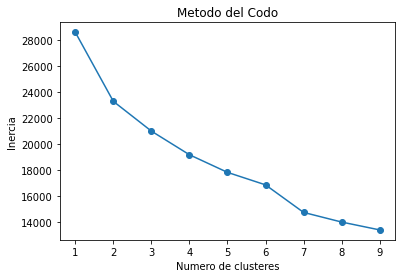

In [13]:
plt.plot(np.arange(1,10), kmeans_inercia, marker='o')
plt.title('Metodo del Codo')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.show()

> La grafica nos muestra que la inercia va reduciendose a partir de 3 clusteres. Sin embargo, no queda del todo claro si dicha cantidad es la optima. 

Vamos apoyarnos en otro metodo conocido como __Silhouette Score__ para determinar el número óptimo de clusteres. 

Es una métrica que mide la calidad del agrupamiento midiendo qué tan bien están separados los clusteres y qué tan bien ajustados están los puntos de datos dentro de los clusteres.

El Score de esta métrica oscila entre 1 y -1:

- Para valores cercanos a 1 indica que los puntos estan bien separados de otros clusteres y bien agrupados dentro de sus clusteres.
- Para valores cercanos a 0 indica que los puntos estan en el borde entre clusteres en una posicin entre dos clusteres.
- Para valores cercanos a -1 indica que los puntos estan mal agrupados.

In [14]:
# importamos el metodo
from sklearn.metrics import silhouette_score

# lista para almacenar el Score de Silhouette
kmeans_sil = []

# ejecutamos el modelo 10 veces iniciando con un cluster de 2
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans.labels_)
    kmeans_sil.append(score)

kmeans_sil

[0.18911467423770312,
 0.20719461733271247,
 0.17959672830615386,
 0.1572292902249729,
 0.15841810261763373,
 0.16834392163330447,
 0.1580094487587763,
 0.1588454120427987,
 0.15731093202936222]

Graficamos el Score en función del número de clusteres para encontrar el más óptimo.

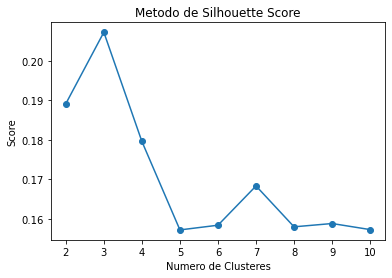

In [15]:
plt.plot(range(2,11), kmeans_sil, marker='o')
plt.title('Metodo de Silhouette Score')
plt.xlabel('Numero de Clusteres')
plt.ylabel('Score')
plt.show()

> La grafica muestra que la cantidad de clusteres óptima es 2. Sin embargo, agrupar los clientes en dos grupos no nos brinda una segmentación relevante y por tanto, decidimos usar 3 clusteres que tambien presenta un buen Score.

## __Modelo óptimo__

Vamos a entrenar el modelo con 3 clusteres para obtener su valor de inercia y las etiquetas que asigna a cada cliente a un cluster.

In [16]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_final.fit(x_scaled)
y_label = kmeans_final.labels_
y_kmeans = kmeans_final.fit_predict(x_scaled)
inercia = kmeans_final.inertia_
print(inercia)

20970.85480077075


Creamos una copia del DataFrame y agregamos una nueva variable llamada Cluster que indica el grupo al que pertenece cada cliente.

In [17]:
df_clusters = df.copy()
df_clusters['Cluster'] = y_kmeans
df_clusters.head()

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,Client_age,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Cluster
0,Graduate,Single,58138.0,0,663,58,1617,57,25,0,0,1,0
1,Graduate,Single,46344.0,2,113,38,27,60,6,0,0,0,1
2,Graduate,Partner,71613.0,0,312,26,776,49,21,0,0,0,0
3,Graduate,Partner,26646.0,1,139,26,53,30,8,0,0,0,1
4,Postgraduate,Partner,58293.0,1,161,94,422,33,19,0,0,0,1


Finalmente, graficamos en un scatterplot de acuerdo al cluster al que corresponde cada cliente, las características con una alta correlación que son: Income (ingresos), Expenses (Gastos) y TotalPurchases (Total de compra en los diferentes medios)

ValueError: Could not interpret value `TotalPurchases` for parameter `y`

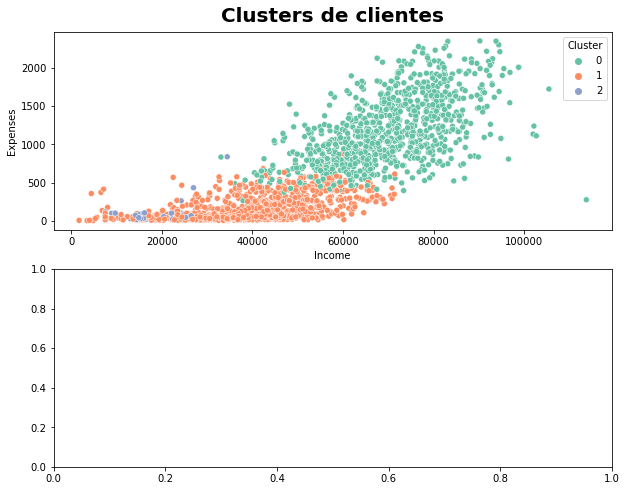

In [18]:
plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)
sns.scatterplot(data=df_clusters, x='Income', y='Expenses', hue='Cluster', palette='Set2')
plt.title('Clusters de clientes',fontsize = 20, fontweight='bold', pad=10)


plt.subplot(2, 1, 2)
sns.scatterplot(data=df_clusters, x='Expenses', y='TotalPurchases', hue='Cluster', palette='Set2')
plt.title('Clusters de clientes',fontsize = 20, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

Vamos apoyarnos en gráficos de boxplot para entender la distribución de cada caracteristicas numerica en los diferentes clusteres.

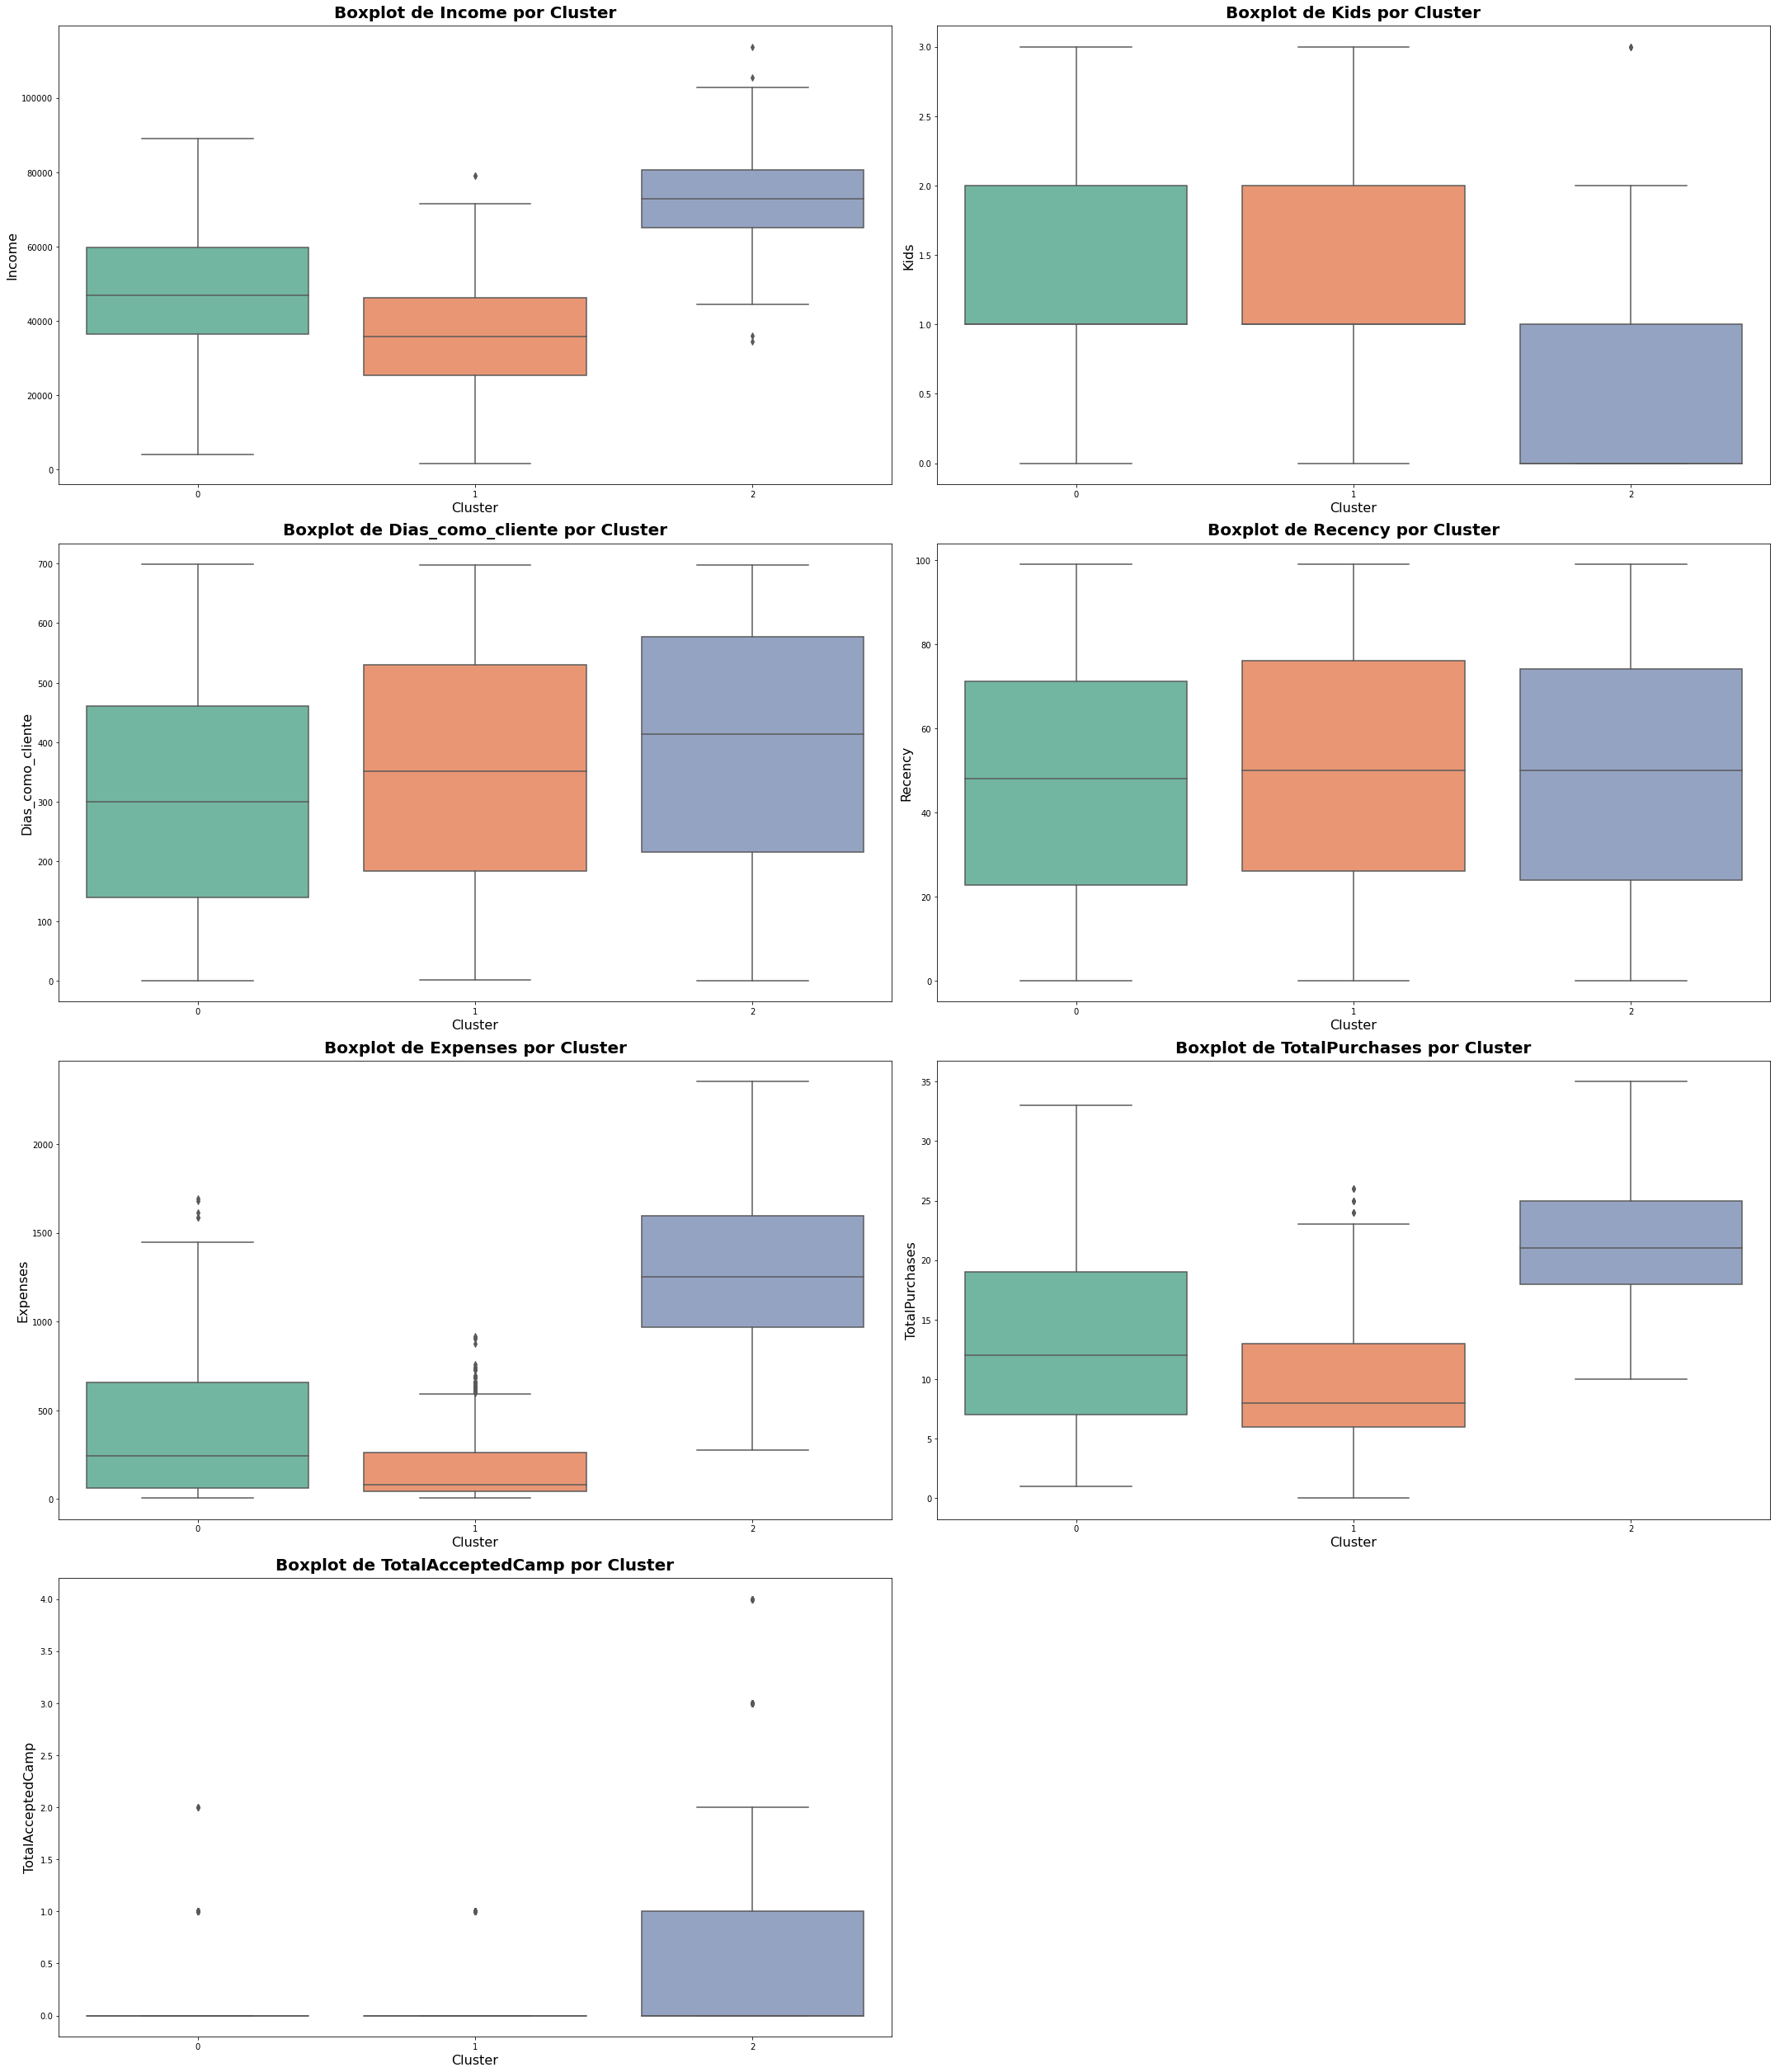

In [ ]:
# lista de caracteristicas numericas a evaluar
columns_to_plot = ['Income', 'Kids', 'Dias_como_cliente', 'Recency', 'Expenses', 'TotalPurchases', 'TotalAcceptedCamp'] 

x=1
plt.figure(figsize=(30,35))
for col in columns_to_plot:
    plt.subplot(4,2,x)
    sns.boxplot(data=df_clusters, x='Cluster', y=col, palette='Set2')
    plt.title(f'Boxplot de {col} por Cluster', pad=10, fontweight='bold', fontsize=20)
    plt.xlabel('Cluster', fontsize=16)
    plt.ylabel(f"{col}" ,fontsize=16)
    plt.tight_layout()
    x+=1

Tambien vamos a crear gráficos de conteo de las variables categoricas en los diferentes clusteres para obtener más información relevante.

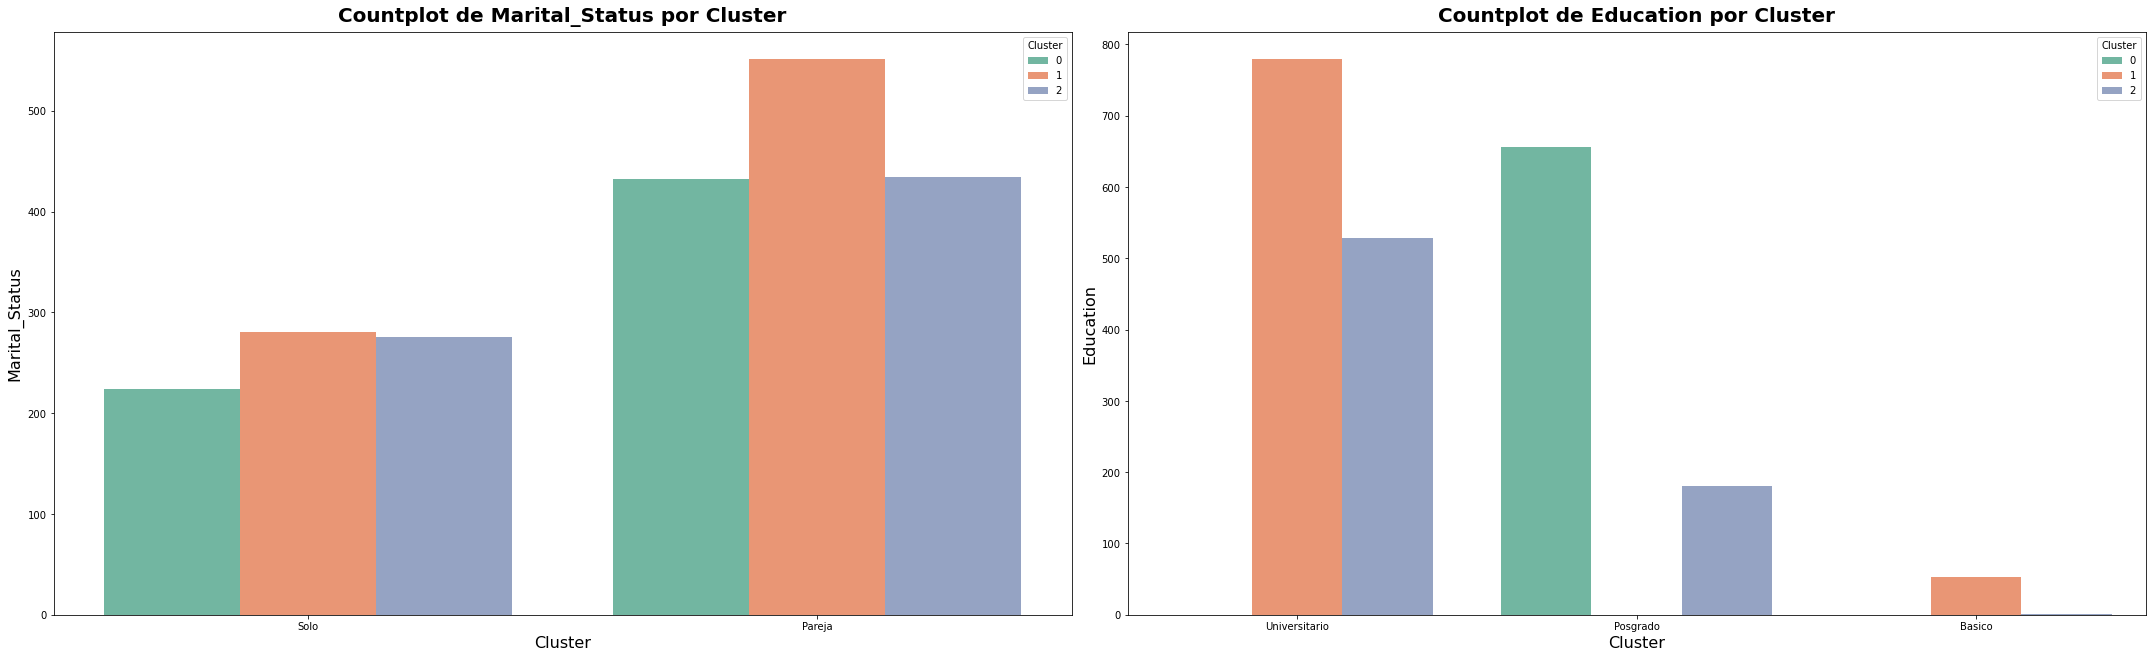

In [ ]:
# lista de caracteristicas numericas a evaluar
columns_to_plot = ['Marital_Status', 'Education'] 

x=1
plt.figure(figsize=(30,35))
for col in columns_to_plot:
    plt.subplot(4,2,x)
    sns.countplot(data=df_clusters, x=col, hue='Cluster', palette='Set2')
    plt.title(f'Countplot de {col} por Cluster', pad=10, fontweight='bold', fontsize=20)
    plt.xlabel('Cluster', fontsize=16)
    plt.ylabel(f"{col}" ,fontsize=16)
    plt.tight_layout()
    x+=1

### Conclusiones

__Cluster 0__:

- Grupo de ingreso medio.
- Con 1 o 2 hijos.
- Mayormente tienen pareja.
- Con nivel educativo de posgrado.
- No acepta ofertas de campañas.
- Tiene un numero promedio de 12 compras.
- Gasta en promedio 250$ aproximadamente.

__Cluster 1__:

- Presenta el ingreso mas bajo.
- Con 1 o 2 hijos.
- Mayormente tienen pareja.
- En su mayoria tienen un nivel educativo universitario.
- No acepta ofertas de campañas.
- Presenta el numero de compra mas bajo, 7 en promedio.
- Gasta en promedio 100$ aproximadamente.

__Cluster 2__:

- Presenta el ingreso mas alto.
- Con 0 o 1 hijo.
- Mayormente tienen pareja.
- Su nivel educativo es mayormente universitario.
- Acepta ofertas de campañas ocasionalmente.
- Tiene un numero de compras promedio de 20, l mas alto de los tres grupos.
- Son los que gastan mas, con promedio de 1300$.